<center> <h1> DS 3000 - Summer 2021</h1> </center>
<center> <h2> DS Report </h2> </center>


<center> <h3> Predicting Historic Olympics Medal Placement</h3> </center>
<center><h4>Kelly Phalen, Emily Wang, Xinyu Wu</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Our project is focused around the Olympics, a longstanding tradition where the top athletes from around the world compete for Bronze, Silver, and Gold medals. Our goal is to determine the most influential factors in determining Olympic medal winners. We obtained a public dataset detailing 120 years of Olympic data, and transformed it to include the features: country, year, sport, event, population, GDP, age, BMI, height, weight, sex, and season. Our target variable is the type of medal earned including none, bronze, silver, or gold, and we are using a supervised classification machine learning model to predict what athletes will earn which medals. Additionally, we transformed our categorical data using Label Encoding and One Hot Encoding and scaled our data using log transformation, Min Max Scaler, and Standard Scaler. To balance our target variable, we resampled using random resampling and SMOTE. We then used K-Nearest Neighbors, Naive Bayes, and Decision Tree classifiers on our test data with feature selection and hyperparameter tuning. Our results showed a successful model using SMOTE sampling, kNN without feature selection nor hyperparameter tuning. We hope that our model is used in future research, and even for predicting the outcome of the 2021 Tokyo Olympics. 


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<h4>Problem Statement</h4>

In this project, we will be training a machine learning model to understand the question: what factors are influential in Olympic medal winners? In general, we hope to develop a model that will identify the likelihood of a given individual winning a Gold, Bronze, Silver, or no medal at the Olympics. Inspired by the upcoming 2021 Summer Olympics and the betting that comes with it, we hope that we can learn more about which sorts of athletes are likely to succeed. We hope to learn if athletes with certain heights and weights perform better in a certain sport, including using body mass index(BMI) to see if that is a determinant of an athlete’s athletic performance. Additionally, we want to see if athletes from different countries are more likely to win and if this is correlated with GDP. 


<h4>Significance of the Problem</h4>

At first glance, this project may seem to be for entertainment purposes rather than something that should be taken seriously. However, we believe that this problem is significant because of the history of the Olympics, it’s importance in our society, and the insights and applications that our project may provide. Held every four years and two years respectively, the Summer and Winter Olympics are an important tradition where athletes from across the globe are able to come together and compete, representing their country. Particularly in a time period where countries do have political tensions and conflicts, the Olympics provide a platform that puts peace and honor above all. Just like most other problems that exist in our world, wealthier, more developed countries tend to have the upper hand when you look at the distribution of Olympic medals between countries. From our project, we will be able to understand whether that difference is significant, or if other factors such as an athlete’s height and weight may be more influential in their performance. In a sense, we hope that our analysis can provide insight on how countries should pick their athletes, and ideally our findings can identify countries who have historically performed worst in the Olympics, and why that may be.

<h4>Previous Research</h4>

Daniel Johnson created Olympic medal predictions that were 94% accurate for the past five Olympics. He is an economics professor at Colorado College, and he used a model that was solely based on economic features of the countries the athletes were from. The features included per-capita income, country’s population, country’s political structure, country’s climate, and advantage if the athlete is from the hosting country or nearby the hosting country$^{1}$.  The dataset he used includes data from Summer and Winter Olympic Games between 1952 and 2000. He set the data to be no earlier than 1952 because pre-war economic measures were hard to define. The data comes from the International Olympic Committee$^{2}$.

Since Daniel Johnson’s model was made public many people have replicated it for future use in predicting Olympic winners. For example, Adam C Dick, an engineer made a model that used dummy encoding to convert categorical variables to numerical ones and used a linear regression model to predict the 2020 Tokyo Olympics (before the date changed due to the pandemic). The dataset he used began with the 1992 Olympic Games (after Soviet Union collapse) in order to minimize the political effects on the games. The goal of this project was to find the total medal count for each nation by creating three separate regression models for bronze, silver, and gold medals and then summing these values to get the total medal count. Adam C Dick also used the Kaggle dataset that we are using, however, he used features similar to Daniel Johnson because of the success of his model. The R-squared value for his predictions is 82% on the testing set$^{3}$. 


$^{1}$"The Man Who Predicts The Medals - Forbes." 19 Jan. 2010, https://www.forbes.com/2010/01/19/olympic-medal-predictions-business-sports-medals.html. Accessed 22 Jun. 2021.

$^{2}$"A Tale of Two Seasons: Participation and Medal Counts at the ...." 29 Oct. 2004, https://onlinelibrary.wiley.com/doi/abs/10.1111/j.0038-4941.2004.00254.x. Accessed 22 Jun. 2021.

$^{3}$"The Tokyo 2020 Olympic Champions. Predicting the medal table of ...." https://towardsdatascience.com/the-tokyo-2020-olympic-champions-ad6bcc7fac72. Accessed 22 Jun. 2021.

<h4>Questions</h4>

Based on our problem statement of determining what factors are influential for Olympic medal winners, we set out to determine: 
1. Is body mass index (BMI) a good determinant of an athlete’s athletic performance?
2. Do athletes from countries with a higher GDP win more medals? 
3. What factor is the most influential in determining a country’s success at the Olympics? 
4. Which supervised machine learning algorithm (k-Nearest Neighbors, Naive Bayes, or Decision Tree) will be the best at predicting the medal outcome of the athlete (None, Bronze, Silver, or Gold)?


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

Our data comes from a public dataset found on Kaggle at the following link: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results. Our dataset is about Olympic athletes and their performance in various events over the span of 120 years. Our dataset contains 206,165 rows after we dropped rows with NaN values. We did this in order to have samples that contained only complete data. The features obtained from this dataset includes sex, age, height, weight, year, country, season, sport, event, and medal. We dropped some features that we felt would not impact our model or were redundant, such as team (which is accounted for by name of country), games (which is included in year and season), and name which does not impact performance of the athlete. We also added the feature BMI, calculated from our height and weight values, for future investigation into its correlation with other features. Additionally, in order to determine if the GDP of the athlete’s country impacts their performance, we added the GDP and population of each country (which comes from the GeoPandas module) to our dataset. Our target variable is the medal earned in the event (gold, silver, bronze, or none).

Our dataset is not balanced in terms of the target variable because as expected, there are significantly more samples with “none” as a medal (meaning they did not win a medal) than samples labelled with “bronze”, “silver” and “gold” in the target variable. 85.4% of our samples were classified as no medal (175,984 samples), 4.8% were classified as gold (10,167 samples), 4.9% were classified as silver (9,866 samples), and 4.9% were classified as bronze (10,148 samples). We compared results for two different methods of resampling: sampling and therefore changing all target counts to be 9,800, and using SMOTE to oversample our minority classes (Bronze, Silver, and Gold) to change all target counts to be 175,739, or the original count of None. 

### 2.1.1 Data Import
In this section, we first import the data from a csv file on github. Then, we go about cleaning the data by dropping null values, getting rid of columns that we do not plan on using (i.e. country codes, athlete id), and also renaming a few columns (we set the original "Medal" column to be the target column).

#### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# pip install geopandas
%matplotlib inline

#### Read dataset as pandas dataframe
Original dataset is from: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
Supporting file (noc_regions) shows country codes and country names; also from same kaggle link. 

The world shape file and dataset is from: https://datacatalog.worldbank.org/dataset/world-bank-official-boundaries

In [4]:
# Import olympic athletes dataset
athletes_url = "https://raw.githubusercontent.com/emily-ywang/Olympics-ML-Project/master/athlete_events.csv"

df_athletes = pd.read_csv(athletes_url)
df_athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
# Read country codes data file
noc_url = "https://raw.githubusercontent.com/emily-ywang/Olympics-ML-Project/master/noc_regions.csv"
noc = pd.read_csv(noc_url)
noc

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [6]:
# Read world shape file from github link for gdp and population features
world_url = "https://github.com/emily-ywang/Olympics-ML-Project/blob/master/world.csv?raw=true"
world = pd.read_csv(world_url)

world

,Unnamed: 0,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,NaN,260580739,17,3028000.0,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,MULTIPOLYGON (((117.7036079042814 4.1634145420...
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,NaN,31381992,15,863000.0,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,MULTIPOLYGON (((117.7036079042814 4.1634145420...
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,NaN,17789267,14,436100.0,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,MULTIPOLYGON (((-69.51008875159459 -17.5065881...
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,NaN,11138234,14,78350.0,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,POLYGON ((-69.51008875159459 -17.5065881976871...
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,NaN,31036656,15,410400.0,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,MULTIPOLYGON (((-69.51008875159459 -17.5065881...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,247,Admin-0 country,2,Dependency,NaN,NaN,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Navassa Island (US),Name in italic,Other,0.085608,0.000413,POLYGON ((-75.02432206870844 18.41726308762145...
247,247,248,Admin-0 country,2,Dependency,NaN,NaN,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Palmyra Atoll (US),Name in italic,Other,0.147363,0.000576,"POLYGON ((-162.0608617830448 5.88719310098088,..."
248,248,249,Admin-0 country,2,Dependency,NaN,NaN,300,2,0.0,...,Förenta staternas mindre öar i Oceanien och Vä...,United States Minor Outlying Islands,Các tiểu đảo xa của Hoa Kỳ,美国本土外小岛屿,Kingman Reef (US),Name in italic,Other,0.059570,0.000222,POLYGON ((-162.4001765620986 6.445135808770601...
249,249,250,Admin-0 country,2,Country,New Zealand,NaN,4510327,12,174800.0,...,Nya Zeeland,Yeni Zelanda,New Zealand,新西兰,Tokelau (NZ),Name in italic,Other,0.178453,0.000348,MULTIPOLYGON (((-171.1856583318665 -9.36126067...


### 2.2. Data Analysis

We are predicting the medal obtained (none, bronze, silver, or gold) for Olympic athletes based on the features country, year, sport, event, population, GDP, age, BMI, height, weight, sex, and season. County, GDP, and population are important features because many countries are better at Olympics than other countries due to their size, since a higher population typically has more chances for good athletes, and GDP affects access to money and resources for sports. All three of these factors show that certain countries, primarily first-world countries perform better in the Olympics than countries with less access to resources. Additionally, certain countries are better at certain events than other countries, for example a country in Africa might not be good at skiing, but a country above the equator that frequently sees snow in the winter might be better at skiing. Therefore, sport and event are important features since certain countries are better at certain events, and certain people based on their height, weight, age, sex, and BMI could be better at these events or sports. BMI, height, weight, sex, and age tell us individual characteristics about the athletes; they are important because these differences play a role in determining if the athlete is a medal winner or not. Year is an important feature because a lot has changed in terms of the Olympics and athletics in general and our dataset stretches pretty far back. Some events no longer exist or events were added over the years. Finally, season is an important feature because there are many more chances to win medals at the Summer Olympics than the Winter Olympics, so our model needs to take this into consideration when predicting what medal an athlete gets. 

This is a supervised machine learning problem because our dataset is labeled, and from these labels, our model is predicting what medal the athlete has won (none, bronze, silver, or gold). Our labels contain information about the athlete, including information about their body, their country, what they are competing in. Using this information and our target variable outcome being known, our model predicts the target variable. Our project tackles a classification problem because we are using features, such as age, height, weight, and event to train our model and given a set of corresponding features, classify the type of medal (bronze, silver, gold, or no medal) an athlete would be most likely to win.

We used k-Nearest Neighbors, Naive-Bayes, and Decision Trees on our data. We chose these because they handle supervised classification machine learning problems. Specifically, we chose k-Nearest Neighbors because for classification problems, it has good performance with little adjustments needed to be made, and since we do not have too many features, it works well. We chose Naive Bayes because it is a probabilistic classification algorithm with efficient parameter estimation, however, we anticipate that other algorithms might generalize better. Finally, we chose Decision Trees because our dataset contains different feature types, and decision trees are particularly good at classifying with different data types, and the decision tree is easy to understand. 


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

# 3. RESULTS

## 3.1. Data Wrangling


### 3.1.1 Data Cleaning: Athletes Dataset

In the cell below, we are dropping samples with Na values in any of the columns except for “Medal” because these missing values will likely result in complications when working with and manipulating the data set.  In the “Medal” column, which is our target variable, the NA values represent no medal won rather than a missing value; therefore, we are replacing all NA values in “Medal” to represent the string none, meaning that the athlete did not win a medal.

In [7]:
# Drop null values (except for Medal) and sort by year
df_athletes.dropna(subset=['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 
                         'Games', 'Year', 'Season', 'City', 'Sport', 'Event'], inplace=True)
df_athletes.sort_values('Year', inplace=True)

# Change remaining Nan values in medal column to be 'None'
df_athletes.replace(np.nan, 'None', regex=True, inplace=True)

# Rename "Medal" column as target
df_athletes.rename(columns={"Medal":"target"}, inplace=True)

### 3.1.2 Data Cleaning and Merging Dataframes: NOC Dataset

In the cells below, we are merging our initial dataframe (with name, NOC (name of country code), age, height, weight, etc.) with a dataframe that has name of country (NOC) codes along with the full name of each country so that our final dataframe has the full name of each country rather than the country code.  We then dropped columns that would not impact the performance of an athlete such as Name, City, ID, as well as redundant columns such as NOC, Teams, and Games.

In [8]:
# Combine NOC region names with NOC codes in dataset
merged = pd.merge(df_athletes, noc, how='inner')
df_data = merged.rename(columns={'region': 'Country'})

In [9]:
# Drop redundant columns (Name, ID, NOC, Games, Sport, notes, City)
df_data.drop(['Name', 'ID', 'NOC', 'Team', 'Games', 'notes', 'City'], axis=1, inplace=True)

### 3.1.3 Data Cleaning and Merging Dataframes: World Dataset

In [10]:
# Limit world dataset to three columns: country name, population, and GDP
df_world = world[['NAME_EN', 'POP_EST', 'GDP_MD_EST']]
df_world.rename(columns={'NAME_EN':'Country', 'POP_EST':'Population', 'GDP_MD_EST':'GDP'}, inplace=True)

# Replace country names that don't match with noc names
df_world.replace({'Country':{"People's Republic of China":"China", "United Kingdom":"UK", 
                          "United States of America":"USA", "The Bahamas":"Bahamas",
                         "Trinidad and Tobago":"Trinidad"}}, inplace=True)

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In the cell below, we are merging our dataset with the dataset containing GDP and population data for each country.

In [11]:
# Rename "Taiwan" country rows as "China" (world dataset only has China, not Taiwan)
df_data.replace({"Country":"Taiwan"}, "China", inplace=True)

# Reorder columns
df_data = df_data[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Country', 'Season', 'Sport', 'Event', 'target']]

# Reset index
df_data.reset_index(drop=True, inplace=True)

# Merge world dataset with athletes dataset
df_data = df_world.merge(df_data)

### 3.1.4 Cleaned and Merged Dataset

In [12]:
df_data

,Country,Population,GDP,Sex,Age,Height,Weight,Year,Season,Sport,Event,target
0,Indonesia,260580739,3028000.0,M,20.0,162.0,57.0,1956,Summer,Athletics,Athletics Men's 100 metres,None
1,Indonesia,260580739,3028000.0,M,22.0,160.0,56.0,1960,Summer,Weightlifting,Weightlifting Men's Bantamweight,None
2,Indonesia,260580739,3028000.0,M,37.0,172.0,70.0,1960,Summer,Sailing,Sailing Mixed Three Person Keelboat,None
3,Indonesia,260580739,3028000.0,M,18.0,172.0,66.0,1960,Summer,Cycling,Cycling Men's 100 kilometres Team Time Trial,None
4,Indonesia,260580739,3028000.0,M,18.0,172.0,66.0,1960,Summer,Cycling,"Cycling Men's Road Race, Individual",None
...,...,...,...,...,...,...,...,...,...,...,...,...
218042,New Zealand,4510327,174800.0,M,25.0,183.0,78.0,2016,Summer,Hockey,Hockey Men's Hockey,None
218043,New Zealand,4510327,174800.0,F,18.0,159.0,58.0,2016,Summer,Diving,Diving Women's Springboard,None
218044,New Zealand,4510327,174800.0,M,36.0,175.0,73.0,2016,Summer,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",None
218045,New Zealand,4510327,174800.0,M,32.0,189.0,70.0,2016,Summer,Rowing,Rowing Men's Lightweight Coxless Fours,None


### 3.1.5 Feature Engineering: Create new BMI feature
BMI = weight (kg) / height (m^2)

In [13]:
# Calculate and insert BMI into merged dataframe
height = df_data['Height']
weight = df_data['Weight']
bmi = weight / ((height/100)**2)
df_data.insert(8, 'BMI', bmi)
df_data

,Country,Population,GDP,Sex,Age,Height,Weight,Year,BMI,Season,Sport,Event,target
0,Indonesia,260580739,3028000.0,M,20.0,162.0,57.0,1956,21.719250,Summer,Athletics,Athletics Men's 100 metres,None
1,Indonesia,260580739,3028000.0,M,22.0,160.0,56.0,1960,21.875000,Summer,Weightlifting,Weightlifting Men's Bantamweight,None
2,Indonesia,260580739,3028000.0,M,37.0,172.0,70.0,1960,23.661439,Summer,Sailing,Sailing Mixed Three Person Keelboat,None
3,Indonesia,260580739,3028000.0,M,18.0,172.0,66.0,1960,22.309356,Summer,Cycling,Cycling Men's 100 kilometres Team Time Trial,None
4,Indonesia,260580739,3028000.0,M,18.0,172.0,66.0,1960,22.309356,Summer,Cycling,"Cycling Men's Road Race, Individual",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218042,New Zealand,4510327,174800.0,M,25.0,183.0,78.0,2016,23.291230,Summer,Hockey,Hockey Men's Hockey,None
218043,New Zealand,4510327,174800.0,F,18.0,159.0,58.0,2016,22.942130,Summer,Diving,Diving Women's Springboard,None
218044,New Zealand,4510327,174800.0,M,36.0,175.0,73.0,2016,23.836735,Summer,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",None
218045,New Zealand,4510327,174800.0,M,32.0,189.0,70.0,2016,19.596316,Summer,Rowing,Rowing Men's Lightweight Coxless Fours,None


### 3.1.6 Data Preprocessing: Feature Encoding and Engineering on Categorical and Binary Variables

#### Label encoding on categorical features

We are implementing label encoding on features including Country, Year, Sport and Event to convert them from categorical values to numerical values so that they can be trained and tested with machine learning models.  In label encoding, each unique categorical value is assigned a number as its "label" in the same corresponding column; for instance, if two samples are both from Germany, it will show the same number label corresponding to Germany for both of those samples in the "Country" column.  Since all of these features have a large number of unique values, we decided to use label encoding (rather than one-hot encoding) to simplify the data and prevent our dataframe from having too many columns since label encoding does not result in additional columns added.

In [13]:
# Create dataframe with only categorical features: country, year, sport, event columns
encoded_features = df_data[['Country', 'Year', 'Sport', 'Event']]
column_names = encoded_features.columns

# Create empty dataframe to store encoded values
cat_feature_sub_df = pd.DataFrame(columns = column_names)

# Apply label encoding for each categorical feature column
from sklearn.preprocessing import LabelEncoder

for i in range(4):
    encoder = LabelEncoder()
    data = encoded_features.iloc[:, i]
    data = data.values.reshape(-1, 1)
    cat_feature_subset = encoder.fit_transform(data)
    cat_feature_sub_df[column_names[i]] = cat_feature_subset

cat_feature_sub_df

C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Country,Year,Sport,Event
0,77,13,3,30
1,77,14,14,201
2,77,14,14,214
3,77,14,3,30
4,77,14,14,201
...,...,...,...,...
218042,123,34,24,310
218043,123,34,19,273
218044,123,34,33,362
218045,123,34,44,474


#### One-hot encoding on binary features

Similarly, we are implementing one-hot encoding on features including Sex and Season to convert them from categorical values to numerical values so that they can be trained and tested with machine learning models; each of our two categorical features will be replaced with 2 features that can have values 0 or 1 showing the existence or absence of that trait in a given column.  We specifically chose the binary features (features that only have two categories each) to implement one-hot encoding on because there would only be a total of 2 columns added for each feature (for a total of four columns added, one for each unique value (female, male, summer, winter)) so our dataframe would not become too large from this one-hot encoding implementation.

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Create dataframe with only binary features: sex, season
binary_features = df_data[["Sex", "Season"]]

# Apply one-hot encoding
encoder = OneHotEncoder(sparse = False)
bin_feature_subset = encoder.fit_transform(binary_features)

# Turn encoded values into a dataframe
bin_feature_sub_df = pd.DataFrame(bin_feature_subset, columns = encoder.get_feature_names())
bin_feature_sub_df

,x0_F,x0_M,x1_Summer,x1_Winter
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
218042,0.0,1.0,1.0,0.0
218043,1.0,0.0,1.0,0.0
218044,1.0,0.0,1.0,0.0
218045,0.0,1.0,1.0,0.0


### 3.1.7 Scaling and Transformations on Numerical Features

#### Identifying skewness in continuous and discrete numerical features

Before implementing model training, we need to understand the distribution of our features and transform them to be normally distributed if they are not to limit biases (i.e. so the model does not place more importance to variables that have larger values).  To do this, we first tested for skewness in our features.

Population skew: 4.353425855792543
GDP skew: 2.45929865039554
Age skew: 1.1317110467290985
BMI skew: 1.3958203380219967
Height skew: 0.015057087030783924
Weight skew: 0.7750550121758749


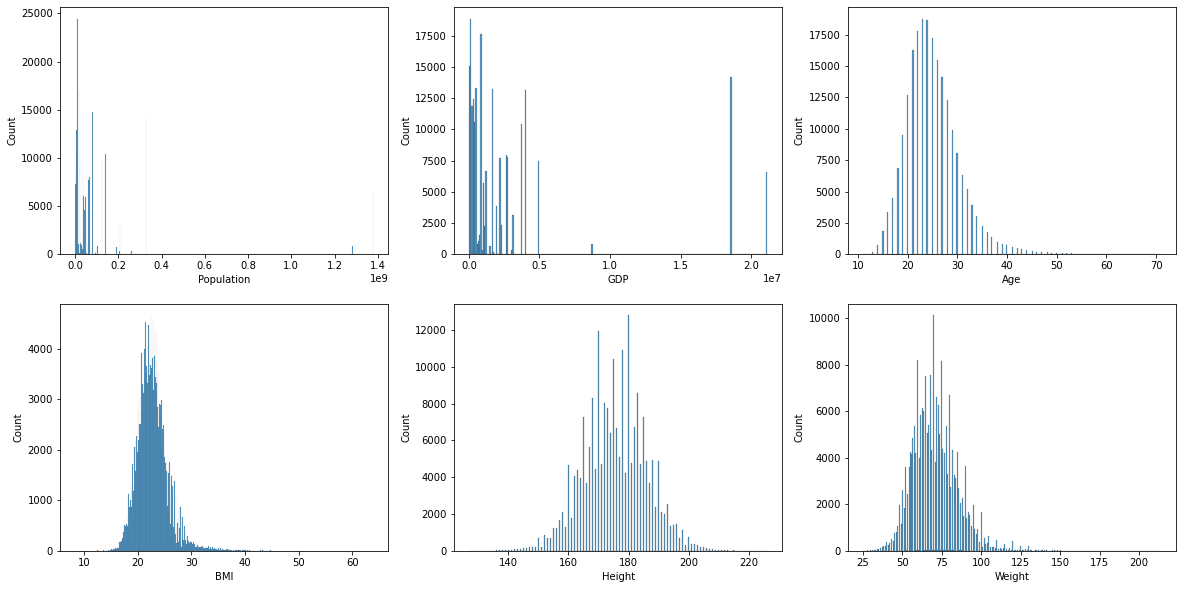

In [15]:
# Test for skewness in numerical variables: Population, GDP, Age BMI, Height, and Weight

def skewness():
    # Find skewness
    feature_names = ['Population', 'GDP', 'Age', 'BMI', 'Height', 'Weight']
    for i in range(len(feature_names)):
        print(f"{feature_names[i]} skew: {df_data[feature_names[i]].skew()}")
        
    # Create dist plots of each variable
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
    for i, ax in zip(range(len(feature_names)), axes.flat):
        sns.histplot(df_data[feature_names[i]], ax=ax)
    plt.show()

skewness()

#### Correcting for skewness using log transformations

Since the distributions of the features were generally skewed, we applied a log function to each of the features to scale and normalize them, as shown below.

In [16]:
# Use log transformation to scale BMI, weight, age features
pop_log = np.log(df_data['Population'])
gdp_log = np.log(df_data['GDP'])
bmi_log = np.log(df_data['BMI'])
weight_log = np.log(df_data['Weight'])
age_log = np.log(df_data['Age'])

log_features = [pop_log, gdp_log, age_log, bmi_log, df_data['Height'], weight_log]
feature_names = ['Population', 'GDP', 'Age', 'BMI', 'Height', 'Weight']

# Normalize log transformed data
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column-lower)/(upper-lower)
    return y

normal_features = []
for i in range(len(log_features)):
    norm = normalize(log_features[i])
    normal_features.append(norm)

# Empty dataframe with transformed and scaled values
cont_feature_sub_df = pd.DataFrame(columns = feature_names)

#### Comparing skewness and distribution before and after log transformations

Population skew: 4.3533959074269974
Population log-transformed skew: -0.27849310670242794 

GDP skew: 2.4592817322309934
GDP log-transformed skew: -0.46672671409623284 

Age skew: 1.1317032613900937
Age log-transformed skew: 0.23774501777568297 

BMI skew: 1.3958107358054654
BMI log-transformed skew: 0.5687729537264419 

Height skew: 0.015056983449107931
Height log-transformed skew: 0.015056983449107286 

Weight skew: 0.775049680367871
Weight log-transformed skew: -0.02391419048588675 



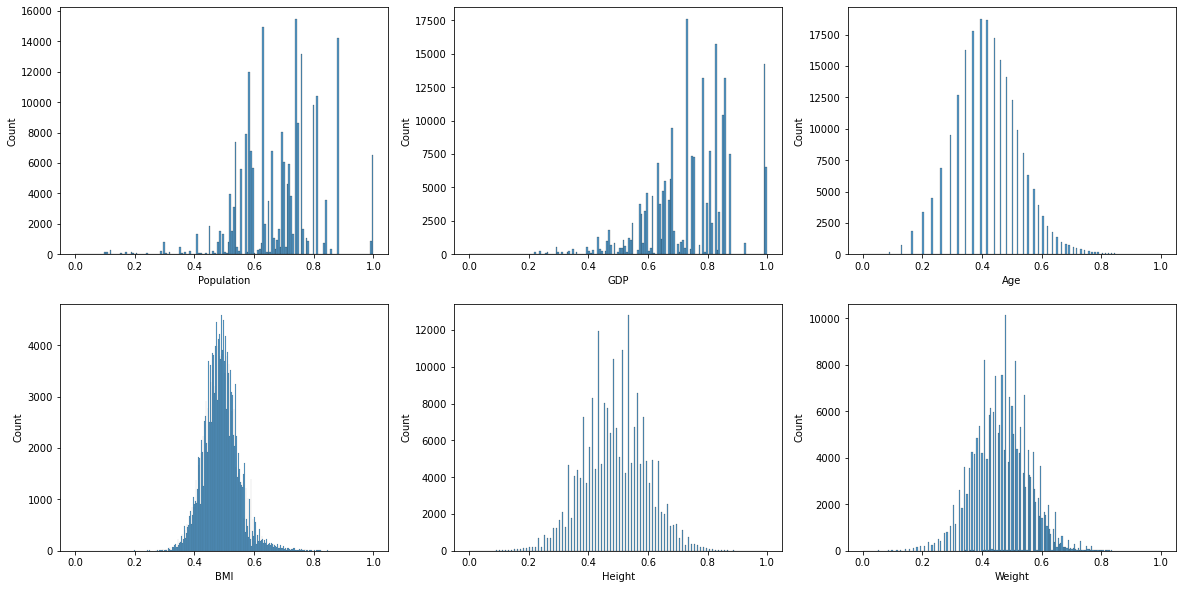

In [17]:
# Find and print new skewness
import scipy.stats

for i in range(len(normal_features)):
    print(f"{feature_names[i]} skew: {float(scipy.stats.skew(df_data[feature_names[i]]))}")
    print(f"{feature_names[i]} log-transformed skew: {float(scipy.stats.skew(normal_features[i]))} \n")
    # Add transformed values to dataframe
    cont_feature_sub_df[feature_names[i]] = normal_features[i]
    
# Create new dist plots with scaled and transformed variables
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
for i, ax in zip(range(len(normal_features)), axes.flat):
    sns.histplot(normal_features[i], ax=ax, label=feature_names[i])
plt.show()

### 3.1.8 Target Variable Label Encoding

Because our target variable contains categorical values (bronze, silver, gold, none), we used label encoding to transform our target values to numerical values for our ML model with 0 representing gold, 1 representing silver, 2 representing bronze, and 3 representing no medal.  We decided to use label encoding instead of one-hot encoding to account for the uneven weighting in our target values since label encoding places greater importance for higher values.  For instance, because we know that athletes competing in the Olympics in real life have a higher probability of not winning a medal, we assigned the highest value 3 to represent no medal, so that there is more weight placed on this value.

In [14]:
# Dictionary of numerical values corresponding to target categories
target_labels = {'Gold':0, 'Silver':1, 'Bronze':2, 'None':3}

# Use dictionary to transform each target value
def transform_medals(column):
    return target_labels[column]

# Apply transformation and create new dataframe with encoded target values
target_encoded_df = df_data
target_encoded_df["target"] = df_data["target"].apply(transform_medals)

### 3.1.9 Various transformed datasets for model testing

#### Original dataset with target variable encoded
This dataset is primarily for data exploration rather than training

In [15]:
target_encoded_df

,Country,Population,GDP,Sex,Age,Height,Weight,Year,BMI,Season,Sport,Event,target
0,Indonesia,260580739,3028000.0,M,20.0,162.0,57.0,1956,21.719250,Summer,Athletics,Athletics Men's 100 metres,3
1,Indonesia,260580739,3028000.0,M,22.0,160.0,56.0,1960,21.875000,Summer,Weightlifting,Weightlifting Men's Bantamweight,3
2,Indonesia,260580739,3028000.0,M,37.0,172.0,70.0,1960,23.661439,Summer,Sailing,Sailing Mixed Three Person Keelboat,3
3,Indonesia,260580739,3028000.0,M,18.0,172.0,66.0,1960,22.309356,Summer,Cycling,Cycling Men's 100 kilometres Team Time Trial,3
4,Indonesia,260580739,3028000.0,M,18.0,172.0,66.0,1960,22.309356,Summer,Cycling,"Cycling Men's Road Race, Individual",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218042,New Zealand,4510327,174800.0,M,25.0,183.0,78.0,2016,23.291230,Summer,Hockey,Hockey Men's Hockey,3
218043,New Zealand,4510327,174800.0,F,18.0,159.0,58.0,2016,22.942130,Summer,Diving,Diving Women's Springboard,3
218044,New Zealand,4510327,174800.0,M,36.0,175.0,73.0,2016,23.836735,Summer,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",3
218045,New Zealand,4510327,174800.0,M,32.0,189.0,70.0,2016,19.596316,Summer,Rowing,Rowing Men's Lightweight Coxless Fours,3


#### Dataset with no log transformations or normalization

In [20]:
# Merge dataset without log transformation
non_transf_features = df_data[['Population', 'GDP', 'Age', 'BMI', 'Height', 'Weight']]
combined_df = pd.concat([cat_feature_sub_df, non_transf_features, bin_feature_sub_df, target_encoded_df['target']], axis=1)
combined_df

,Country,Year,Sport,Event,Population,GDP,Age,BMI,Height,Weight,x0_F,x0_M,x1_Summer,x1_Winter,target
0,77,13,3,30,260580739,3028000.0,20.0,21.719250,162.0,57.0,0.0,1.0,1.0,0.0,3
1,77,14,14,201,260580739,3028000.0,27.0,22.985398,172.0,68.0,0.0,1.0,1.0,0.0,3
2,77,14,14,214,260580739,3028000.0,27.0,22.985398,172.0,68.0,0.0,1.0,1.0,0.0,3
3,77,14,3,30,260580739,3028000.0,24.0,21.719250,162.0,57.0,0.0,1.0,1.0,0.0,3
4,77,14,14,201,260580739,3028000.0,27.0,21.461937,178.0,68.0,0.0,1.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218042,123,34,24,310,4510327,174800.0,27.0,22.530864,180.0,73.0,0.0,1.0,1.0,0.0,3
218043,123,34,19,273,4510327,174800.0,26.0,21.705129,177.0,68.0,1.0,0.0,1.0,0.0,3
218044,123,34,33,362,4510327,174800.0,25.0,20.685150,166.0,57.0,1.0,0.0,1.0,0.0,3
218045,123,34,44,474,4510327,174800.0,24.0,20.916233,198.0,82.0,0.0,1.0,1.0,0.0,3


#### Dataset with log transformations and normalized

In [21]:
# Merge dataset with log transformation
df_log_transf = pd.concat([cat_feature_sub_df, cont_feature_sub_df, bin_feature_sub_df, target_encoded_df['target']], axis=1)
df_log_transf

,Country,Year,Sport,Event,Population,GDP,Age,BMI,Height,Weight,x0_F,x0_M,x1_Summer,x1_Winter,target
0,77,13,3,30,0.860060,0.836021,0.320593,0.469387,0.353535,0.383855,0.0,1.0,1.0,0.0,3
1,77,14,14,201,0.860060,0.836021,0.481526,0.497247,0.454545,0.466039,0.0,1.0,1.0,0.0,3
2,77,14,14,214,0.860060,0.836021,0.481526,0.497247,0.454545,0.466039,0.0,1.0,1.0,0.0,3
3,77,14,3,30,0.860060,0.836021,0.418364,0.469387,0.353535,0.383855,0.0,1.0,1.0,0.0,3
4,77,14,14,201,0.860060,0.836021,0.481526,0.463527,0.515152,0.466039,0.0,1.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218042,123,34,24,310,0.519408,0.595360,0.481526,0.487426,0.535354,0.499084,0.0,1.0,1.0,0.0,3
218043,123,34,19,273,0.519408,0.595360,0.461287,0.469067,0.505051,0.466039,1.0,0.0,1.0,0.0,3
218044,123,34,33,362,0.519408,0.595360,0.440255,0.445401,0.393939,0.383855,1.0,0.0,1.0,0.0,3
218045,123,34,44,474,0.519408,0.595360,0.418364,0.450863,0.717172,0.553231,0.0,1.0,1.0,0.0,3


## 3.2. Data Exploration


### 3.2.1 Preliminary Exploration of Dataset

The visualizations below demonstrate our preliminary explorations into our dataset.  The displot below demonstrates the distribution of our samples by gender.  The displot demonstrates that our data samples are represented with significantly more male athletes than female athletes with the number of male athletes (140,000+) approximately doubling the number of female athletes (70,000+).

Text(0.5, 1.0, 'Sex Distribution of Olympic Athletes')

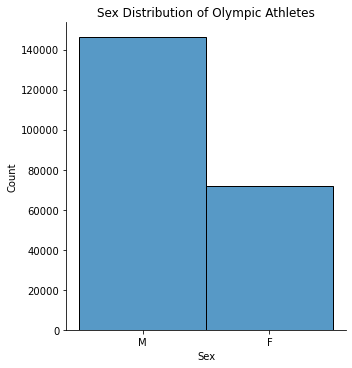

In [17]:
sns.displot(target_encoded_df, x="Sex")

#specify the title
title = "Sex Distribution of Olympic Athletes"

#set the title of the plot
plt.title(title)

The displot below demonstrates the distribution of our samples by Olympic season.  The displot demonstrates that our data samples are represented with significantly more summer athletes than winter athletes with the number of summer athletes (175,000+) tripling the number of winter athletes (40,000+).  This makes sense, as there are also many more sports and events in the Summer Olympics than Winter Olympics, so collectively, there would be many more athletes participating in the summer than winter.

Text(0.5, 1.0, 'Season Distribution of Olympic Dataset')

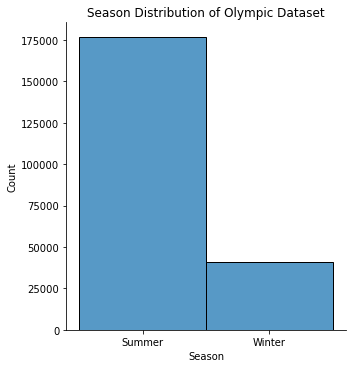

In [18]:
sns.displot(target_encoded_df, x="Season")

#specify the title
title = "Season Distribution of Olympic Dataset"

#set the title of the plot
plt.title(title)

The histogram below demonstrates the distribution of our samples by age.  The histogram demonstrates that the distribution of age has a positive skew, with the majority of athletes in the samples centering around the 20-30 year old age range and the number of athletes drastically decreasing toward the right at older ages.  This makes sense as Olympians have to be in strong and optimal health to compete in strenuous practices and competitions, and the younger age range (20-30) is when people are typically in optimal health.

Text(0.5, 1.0, 'Age Distribution of Olympic Athletes')

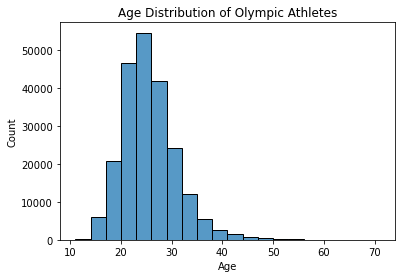

In [19]:
sns.histplot(target_encoded_df, x="Age", bins=20)

#specify the title
title = "Age Distribution of Olympic Athletes"

#set the title of the plot
plt.title(title)

The kernel density plot below demonstrates the distribution of athletes in terms of their age and BMI.  As shown by the graph, the "most dense" areas are represented by the smallest inner circles which shows that the majority of female athletes (represented by orange) cluster around the early 20s (in age) and a body mass index of approximately 21.  Similarly, a large number of male athletes cluster around a BMI of 25 and an age in the early 20s.  The circular shapes for female athletes is more dense (are grouped closely together), indicating that the distribution of females' ages and BMIs is relatively smaller.  In comparison, the plot for male athletes is less dense (has more shapes that are grouped farther apart), indicating a more spread out distribution of ages/BMIs.

No handles with labels found to put in legend.


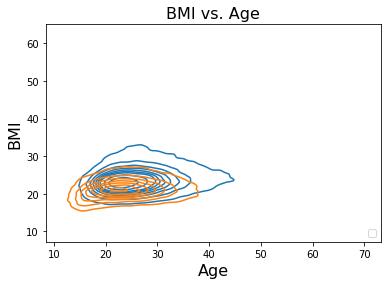

In [25]:
# Create and display the kernel density plot
graph = sns.kdeplot(x="Age", y="BMI", hue = "Sex", 
                        data = df_data)

# Specify the title
title = "BMI vs. Age"

# Set the title of the plot
graph.set_title(title, size = 16)

# Add labels to the axes  
graph.set_xlabel("Age", size = 16)
graph.set_ylabel("BMI", size = 16)

# Move the legend to lower right
plt.legend(loc="lower right")


In [26]:
def heatmap(dataframe, start_col, end_col, color):
    df_features = dataframe.iloc[:, start_col:end_col]
    
    # Find the correlation coefficient between each trait as a new dataframe (absolute value applied so all coefficients between 0 and 1)
    df_corr = df_features.corr().abs()
    
    # Set sizes of figure
    fig_dims = (10, 7)
    fig, ax = plt.subplots(figsize=fig_dims)
    
    # Create a blue heatmap of strengh of correlation
    viz = sns.heatmap(df_corr, vmin=0, vmax=1, linewidths=0.5, cmap=color, ax=ax)
    viz.set(title="Correlation between Variables")

#### Heatmap of correlation (features compared with type of medal) ###

The heatmap below depicts how strongly each variable correlates with each other (as shown by the key on the side, the darker the blue in the box, the stronger the correlation is between variables).  The variables that have the most correlation include height and weight, GDP and population.  Given this heat map, features such as GDP, height and weight seem to have a stronger correlation with the target variable (type of medal won).  However, the correlations between each individual variable and target does not seem to be very strong overall (shown by the lightness in color of the target column).

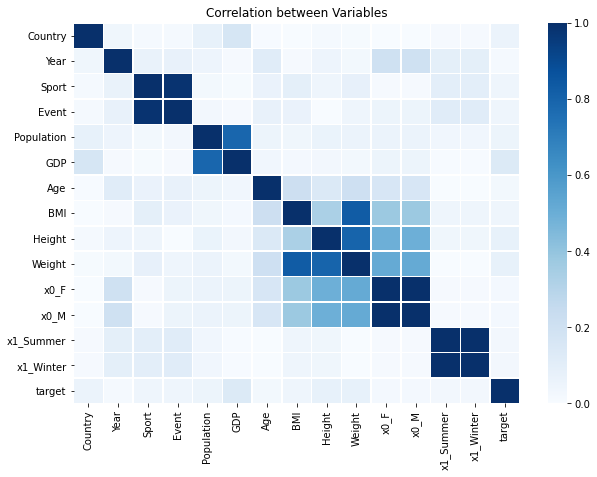

In [27]:
heatmap(combined_df, 0, 16, 'Blues')

### 3.2.2 Data Exploration Sorted by Country and Total Number of Medals

#### Create new dataframe sorted by country with total number of medals ###

To better understand and visualize our data from a more concise standpoint, we decided to create another dataframe by grouping our original dataframe by country and looking at metrics such as total medals won by each country, the total number of athletes each country sent, the median age, weight, height, BMI of each country's athletes, and the most common sport, event and season of each country.  We were able to compare these calculated metrics to other columns such as each country's GDP and population to gain a better understanding of how these variables may affect each other.

In [28]:
# Function used to change medal type to number of medals (to sum by country after)
def change_target(medal):
    if medal == 0 or medal == 1 or medal == 2:
        medal = 1
    else:
        medal = 0
    return medal

In [29]:
# Count number of entries for each country to determine number of athletes and add to df_data
df_data['Number of Athletes'] = df_data.groupby('Country')['Country'].transform('count') 
df_data

,Country,Population,GDP,Sex,Age,Height,Weight,Year,BMI,Season,Sport,Event,target,Number of Athletes
0,Indonesia,260580739,3028000.0,M,20.0,162.0,57.0,1956,21.719250,Summer,Athletics,Athletics Men's 100 metres,3,334
1,Indonesia,260580739,3028000.0,M,27.0,172.0,68.0,1960,22.985398,Summer,Cycling,Cycling Men's 100 kilometres Team Time Trial,3,334
2,Indonesia,260580739,3028000.0,M,27.0,172.0,68.0,1960,22.985398,Summer,Cycling,"Cycling Men's Road Race, Individual",3,334
3,Indonesia,260580739,3028000.0,M,24.0,162.0,57.0,1960,21.719250,Summer,Athletics,Athletics Men's 100 metres,3,334
4,Indonesia,260580739,3028000.0,M,27.0,178.0,68.0,1960,21.461937,Summer,Cycling,Cycling Men's 100 kilometres Team Time Trial,3,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218042,New Zealand,4510327,174800.0,M,27.0,180.0,73.0,2016,22.530864,Summer,Hockey,Hockey Men's Hockey,3,3880
218043,New Zealand,4510327,174800.0,F,26.0,177.0,68.0,2016,21.705129,Summer,Football,Football Women's Football,3,3880
218044,New Zealand,4510327,174800.0,F,25.0,166.0,57.0,2016,20.685150,Summer,Rowing,Rowing Women's Lightweight Double Sculls,3,3880
218045,New Zealand,4510327,174800.0,M,24.0,198.0,82.0,2016,20.916233,Summer,Swimming,Swimming Men's 200 metres Freestyle,3,3880


In [30]:
# Create df_summary grouped by country
df_summary = df_data.iloc[:, 0:14]
df_summary['GDP per Capita'] = df_summary['GDP']/df_summary['Population']

# Find total medals, median BMI, median Age, median Weight, most common event, most common sport, most common season, year with most athletes, number of athletes, GDP, GDP per capita, and Population for each country
df_summary['Total Medals'] = df_summary['target'].apply(change_target)
df_summary = df_summary.groupby('Country', as_index=False).agg({'Total Medals': 'sum', 'Population':lambda x: pd.Series.mode(x)[0],
                                                                'GDP':lambda x: pd.Series.mode(x)[0], 'Age': 'median', 'Height':'median','Weight':'median', 'Year':lambda x: pd.Series.mode(x)[0],
                                                                'BMI':'median', 'Season':lambda x: pd.Series.mode(x)[0], 'Sport':lambda x: pd.Series.mode(x)[0], 
                                                                'GDP per Capita':lambda x: pd.Series.mode(x)[0], 'Event':lambda x: pd.Series.mode(x)[0], 'Number of Athletes':lambda x: pd.Series.mode(x)[0]})
df_summary['Medals per Athlete'] = (df_summary['Total Medals']/df_summary['Number of Athletes'])
df_summary

,Country,Total Medals,Population,GDP,Age,Height,Weight,Year,BMI,Season,Sport,GDP per Capita,Event,Number of Athletes,Medals per Athlete
0,Afghanistan,2,34124811,64080.0,23.0,170.0,64.0,1960,22.128136,Summer,Wrestling,0.001878,Athletics Men's 100 metres,54,0.037037
1,Albania,0,3047987,33900.0,23.0,170.0,69.0,2008,23.087868,Summer,Weightlifting,0.011122,"Shooting Women's Sporting Pistol, 25 metres",57,0.000000
2,Algeria,15,40969443,609400.0,24.0,175.0,66.0,2016,21.971336,Summer,Athletics,0.014875,Handball Men's Handball,481,0.031185
3,American Samoa,0,51504,711.0,26.0,175.0,82.0,1988,26.595745,Summer,Athletics,0.013805,Athletics Men's 100 metres,21,0.000000
4,Andorra,0,85702,3327.0,22.0,173.0,71.0,2010,23.255019,Winter,Alpine Skiing,0.038821,Alpine Skiing Men's Giant Slalom,135,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela,15,31304016,468600.0,24.0,173.0,69.0,2008,22.720438,Summer,Swimming,0.014969,"Cycling Men's Road Race, Individual",785,0.019108
185,Vietnam,4,96160163,594900.0,23.0,165.0,58.0,1980,20.831262,Summer,Swimming,0.006187,"Cycling Men's Road Race, Individual",182,0.021978
186,Yemen,0,28036829,73450.0,21.0,168.0,61.0,1988,21.773842,Summer,Athletics,0.002620,"Athletics Men's 1,500 metres",37,0.000000
187,Zambia,1,15972000,65170.0,23.0,175.0,67.0,1988,21.604938,Summer,Athletics,0.004080,Football Men's Football,128,0.007812


#### Create new dataframe from df_summary containing top 20 medal-winning countries ####

In [31]:
# Create df of top 20 countries with most medals
top_df = df_summary.nlargest(n=20, columns='Total Medals', keep='first')
top_df

,Country,Total Medals,Population,GDP,Age,Height,Weight,Year,BMI,Season,Sport,GDP per Capita,Event,Number of Athletes,Medals per Athlete
177,USA,4383,326625791,18560000.0,24.0,178.0,72.0,1992,22.720438,Summer,Athletics,0.056823,Ice Hockey Men's Ice Hockey,14214,0.308358
143,Russia,3610,142257519,3745000.0,25.0,176.0,70.0,1988,22.720438,Summer,Athletics,0.026325,Ice Hockey Men's Ice Hockey,10398,0.347182
63,Germany,3189,80594017,3979000.0,24.0,178.0,70.0,1972,22.530864,Summer,Athletics,0.049371,Ice Hockey Men's Ice Hockey,13183,0.241902
122,Netherlands,2832,17084719,870800.0,25.0,180.0,73.0,2016,22.460034,Summer,Swimming,0.050970,Hockey Men's Hockey,14916,0.189863
9,Australia,1210,23232413,1189000.0,24.0,177.0,71.0,2000,22.662709,Summer,Swimming,0.051178,Hockey Men's Hockey,6630,0.182504
31,Canada,1060,35623680,1674000.0,24.0,175.0,70.0,1988,22.656250,Summer,Athletics,0.046991,Ice Hockey Men's Ice Hockey,7966,0.133066
82,Italy,1060,62137802,2221000.0,25.0,175.0,70.0,1992,22.675737,Summer,Athletics,0.035743,Water Polo Men's Water Polo,7697,0.137716
37,China,1038,1379302771,21140000.0,23.0,172.0,65.0,2008,21.913806,Summer,Swimming,0.015327,Basketball Men's Basketball,6555,0.158352
176,UK,1031,64769452,2788000.0,25.0,175.0,70.0,2012,22.530864,Summer,Athletics,0.043045,Hockey Men's Hockey,7766,0.132758
60,France,987,67106161,2699000.0,25.0,175.0,69.0,1992,22.275310,Summer,Athletics,0.040220,Ice Hockey Men's Ice Hockey,7977,0.123731


#### Create new dataframe from df_summary containing countries with top 20 medal per athlete values ####

In [34]:
# Create df with top 20 countries with largest medals per athlete ratio
medal_per_athlete_df = df_summary.nlargest(n=20, columns='Medals per Athlete', keep='first')
medal_per_athlete_df.reset_index(inplace=True)
medal_per_athlete_df

,index,Country,Total Medals,Population,GDP,Age,Height,Weight,Year,BMI,Season,Sport,GDP per Capita,Event,Number of Athletes,Medals per Athlete
0,143,Russia,3610,142257519,3745000.0,25.0,176.0,70.0,1988,22.720438,Summer,Athletics,0.026325,Ice Hockey Men's Ice Hockey,10398,0.347182
1,177,USA,4383,326625791,18560000.0,24.0,178.0,72.0,1992,22.720438,Summer,Athletics,0.056823,Ice Hockey Men's Ice Hockey,14214,0.308358
2,130,Pakistan,107,204924861,988200.0,25.0,174.0,70.0,1960,22.592987,Summer,Hockey,0.004822,Hockey Men's Hockey,366,0.292350
3,63,Germany,3189,80594017,3979000.0,24.0,178.0,70.0,1972,22.530864,Summer,Athletics,0.049371,Ice Hockey Men's Ice Hockey,13183,0.241902
4,150,Serbia,467,7111024,101800.0,24.0,180.0,75.0,1984,23.405654,Summer,Athletics,0.014316,Water Polo Men's Water Polo,2342,0.199402
5,84,Jamaica,154,2990561,25390.0,24.0,176.0,68.0,2016,21.877551,Summer,Athletics,0.008490,Athletics Men's 4 x 400 metres Relay,809,0.190358
6,122,Netherlands,2832,17084719,870800.0,25.0,180.0,73.0,2016,22.460034,Summer,Swimming,0.050970,Hockey Men's Hockey,14916,0.189863
7,9,Australia,1210,23232413,1189000.0,24.0,177.0,71.0,2000,22.662709,Summer,Swimming,0.051178,Hockey Men's Hockey,6630,0.182504
8,43,Cuba,394,11147407,132900.0,24.0,175.0,72.0,1980,23.306680,Summer,Athletics,0.011922,Baseball Men's Baseball,2210,0.178281
9,142,Romania,597,21529967,441000.0,24.0,173.0,67.0,1980,22.491349,Summer,Gymnastics,0.020483,Rowing Women's Coxed Eights,3477,0.171700


#### Visualizations from dataframe grouped by country ###

The scatterplot below depicts a relatively strong positive correlation between the number of athletes and the total medals won; in other words, the greater the number of athletes a country sends to the Olympics, the more likely that country will win more medals.  This would make sense because having more athletes competing would naturally mean that a country would be more likely to win more medals by virtue of having more participants.  While the size of each point represents GDP per Capita, there does not seem to be a very strong correlation between GDP per Capita and the Number of Athletes/Total Medals; most of the countries that won the most medals have a GDP per Capita that is neither too large nor too small.  To account for this disparity and create a metric that would make countries comparable to each other, we created the column "Medals per Athlete", which we calculated by dividing the total medals of a country by the number of total athletes that country had.

Text(0, 0.5, 'Total Medals')

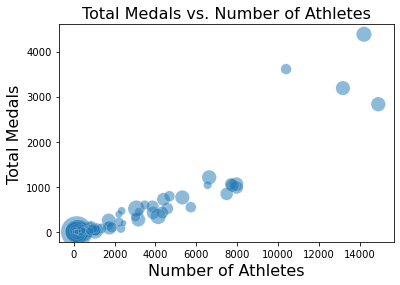

In [35]:
# Create and display the scatterplot
graph = sns.scatterplot(x="Number of Athletes", y="Total Medals", size = "GDP per Capita", sizes= (10, 1000), data = df_summary, alpha=.5, legend=False)

# Specify the title
title = "Total Medals vs. Number of Athletes"

# Set the title of the plot
graph.set_title(title, size = 16)

# Add labels to the axes  
graph.set_xlabel("Number of Athletes", size = 16)
graph.set_ylabel("Total Medals", size = 16)


#### Heatmap depicting correlation between traits by country (features compared with medals per athlete) ###

The heatmap below demonstrates how strongly each variable correlates with each other in the dataframe grouped by country.  From the heatmap, the moderate to strong correlations (of variables that are not derived from each other (for instance, BMI is calculated from weight and height)) exist between variables such as GDP and Total Medals, Number of Athletes and Total Medals, and GDP and Number of Athletes sent to the Olympics.  Furthermore, GDP has a moderate correlation with Medals per Athlete, which indicates that the countries with higher GDP (wealthier) are more likely to win more medals.

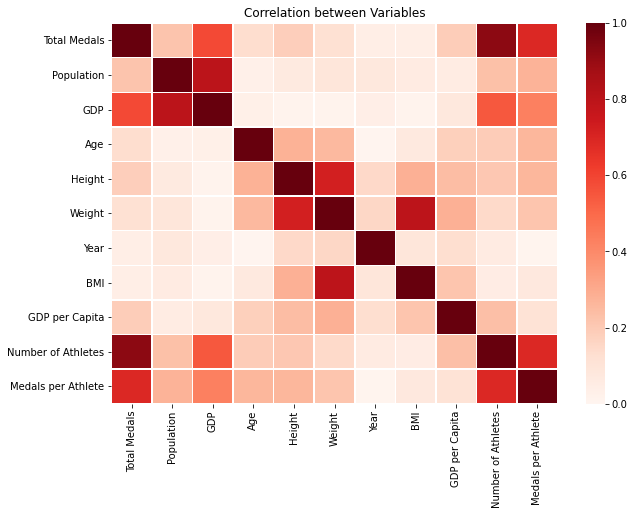

In [36]:
heatmap(df_summary, 0, 16, 'Reds')

The scatterplot below compares GDP of a country by Medals per Athlete for each country.  The general trend of the scatterplot shows a slight positive correlation, which implies that higher the GDP of a country, the greater the Medals per Athlete that country will have.  However, there are also many data points in the graph which represent countries with lower GDP values but high Medals per Athlete values, which is why the positive correlation is not as strong.

Text(0, 0.5, 'Medals per Athlete')

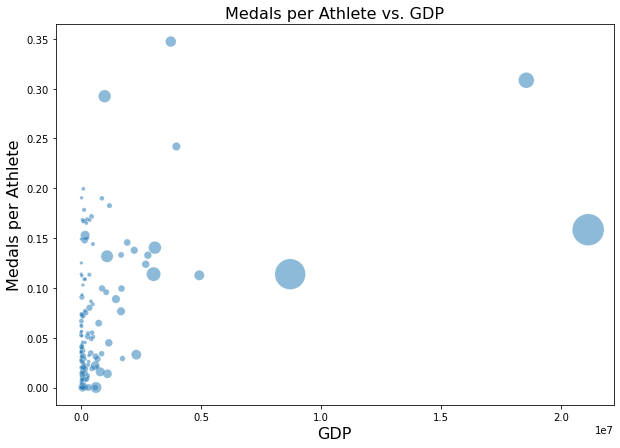

In [37]:
# Set sizes of figure
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)

# Create and display the scatterplot
graph = sns.scatterplot(x="GDP", y="Medals per Athlete", size = "Population", sizes= (10, 1000), data = df_summary, alpha=.5, ax=ax, legend=False)

# Specify the title
title = "Medals per Athlete vs. GDP"

# Set the title of the plot
graph.set_title(title, size = 16)

# Add labels to the axes  
graph.set_xlabel("GDP", size = 16)
graph.set_ylabel("Medals per Athlete", size = 16)

The bar graph below demonstrates the top 20 countries with the most Olympic medals and the the number of total medals that each country received.  From the graph, it is evident that overall, the United States has accumulated the most medals wth 4,000+ medals, followed by Russia (3,500+ medals) and then Germany (3,000+ medals).

Text(0, 0.5, 'Total Medals')

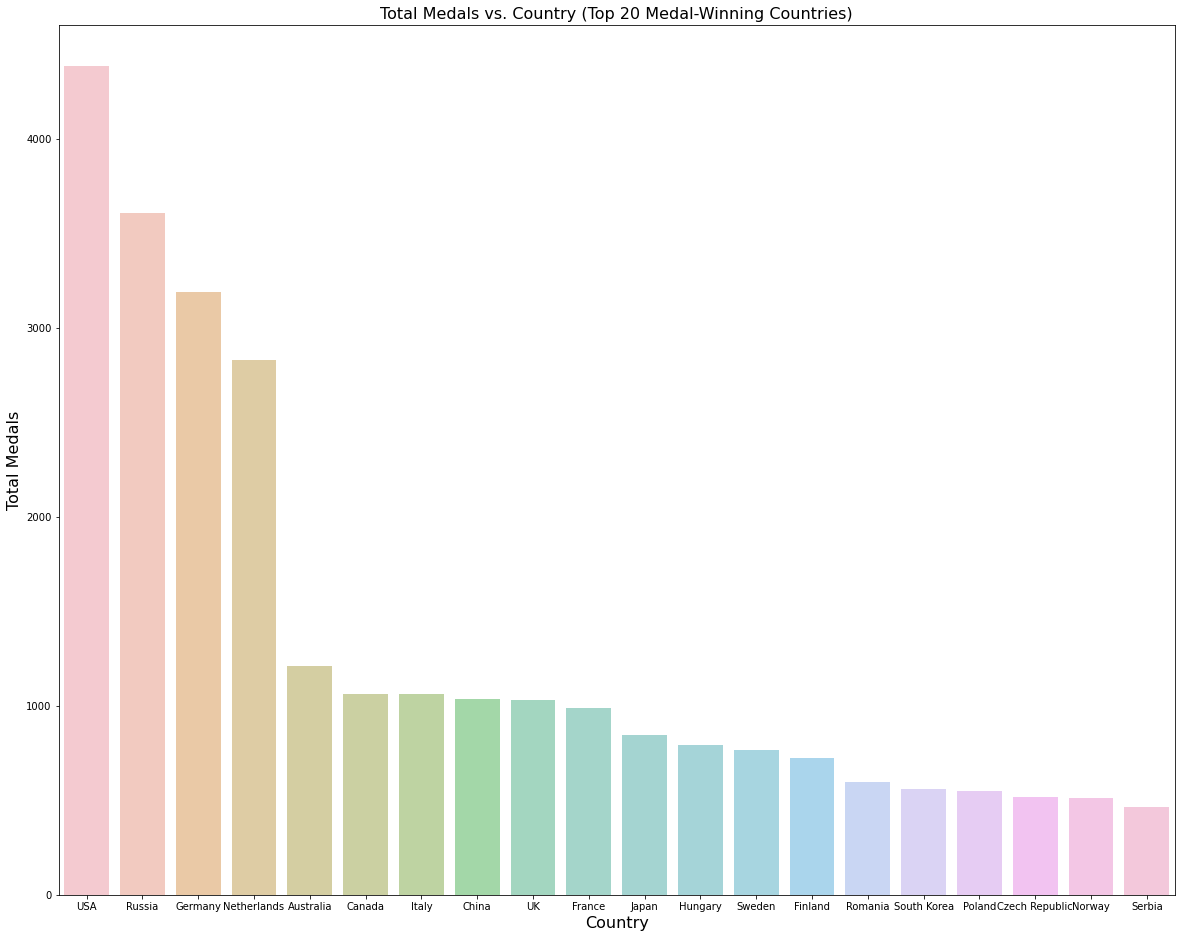

In [38]:
# Set sizes of figure
fig_dims = (20, 16)
fig, ax = plt.subplots(figsize=fig_dims)

# Create and display the bar plot
graph = sns.barplot(x="Country", y="Total Medals", data = top_df, alpha=.5, ax=ax)

# Specify the title
title = "Total Medals vs. Country (Top 20 Medal-Winning Countries)"

# Set the title of the plot
graph.set_title(title, size = 16)

# Add labels to the axes  
graph.set_xlabel("Country", size = 16)
graph.set_ylabel("Total Medals", size = 16)

To put the two metrics Total Medals and Number of Athletes together to make the number of medals each country earned more comparable (since we have already shown that the number of athletes sent to the Olympics directly correlates with the total number of medals won), the bar graph below demonstrates the top 20 medal-winning countries and the number of Medals per One Athlete for each country.  From the graph, it is evident that overall, Russia has the highest Medals per Athlete value at about 0.34 while the U.S. follows at 0.31, which is followed by Pakistan with 0.29.

Text(0, 0.5, 'Medals per Athlete')

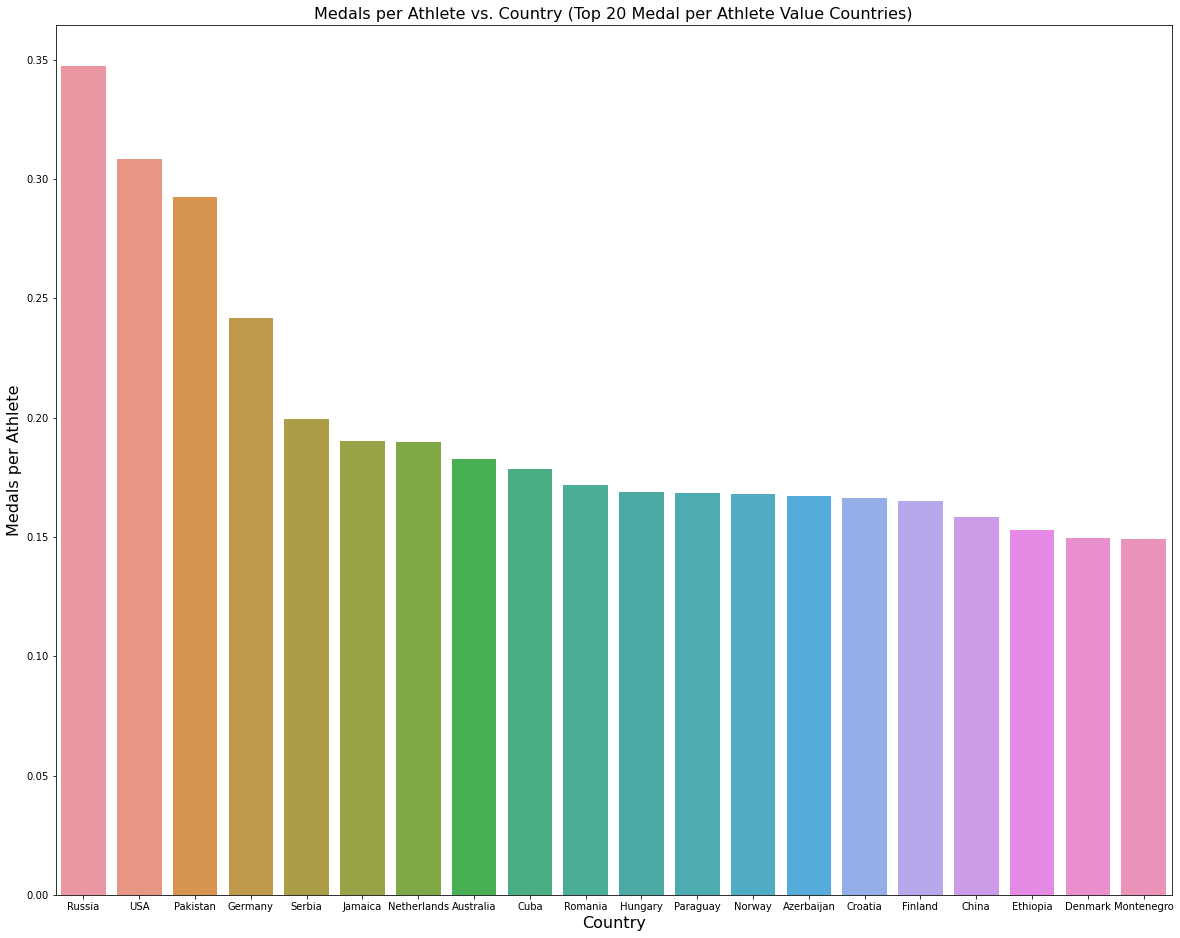

In [39]:
# Set sizes of figure
fig_dims = (20, 16)
fig, ax = plt.subplots(figsize=fig_dims)

# Create and display the bar plot
graph = sns.barplot(x="Country", y="Medals per Athlete", data = medal_per_athlete_df, ax=ax)

# Specify the title
title = "Medals per Athlete vs. Country (Top 20 Medal per Athlete Value Countries)"

# Set the title of the plot
graph.set_title(title, size = 16)

# Add labels to the axes  
graph.set_xlabel("Country", size = 16)
graph.set_ylabel("Medals per Athlete", size = 16)



### 3.3. Model Training


### 3.3.1 Model Training Methods: Overview
#### Algorithms:
1. kNN Classifier
2. Decision Tree
3. Naive Bayes

#### Sampling methods:
1. Simple Random Sampling
2. SMOTE Sampling

#### Scaling methods:
1. Log-transformations (see data wrangling)
2. Standard Scaler
3. Minmax Scaler

#### Evaluation metrics:
1. Accuracy
2. Precision
3. Recall
4. F1-score

### 3.3.2 Defining Models to Train as a Dictionary

In [40]:
# Import models: KNN, Naive Bayse, Decision Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Store estimators as a dictionary for easy reference when training and testing
estimators = {'k-Nearest Neighbor': KNeighborsClassifier(), 'Gaussian Naive Bayes': GaussianNB(), 
              'Decision Tree': DecisionTreeClassifier()}

### 3.3.3 Initialize Evaluation Metrics Dataframe
We use this dataframe to store the different modeling techniques. This includes various scaling methods, sampling methods, and also hyperparameter tuning. For performance metrics, we use accuracy, f1-score, recall, and precision. We find each of these values for the different models and optimization techniques.

In the model training we use an accuracy measure called score that is available in the sklearn library as .score(). This is commonly used to determine model accuracy since it compares the difference between the predicted output versus the actual output on the training or testing set. Essentially, the features are imputed to the model and it is trained to predict an output, the target variable; then this predicted output is compared to the actual target variable and the percentage accuracy is computed. 

Other than accuracy, we also use a few different common classification performance evaluation metrics: precision, recall, and f1-score. We found all of these using sk-learn’s classification report function. 

Precision measures the ratio tp / (tp + fp), or the true positive rate. Generally, this evaluation metric is used for classification models as it identifies the ability of a given model to not label a false positive. In application to our project, this would be if an athlete is identified as a medal winner but actually did not win. This is an important measure of our model’s abilities as it is a good measure of how well the model is able to answer our question: can we predict who will win? If we have a low precision rate, we may misidentify losers as winners.

Recall is generally understood as the opposite of precision. It measures the true negative rate, or tp / (tp + fn). In the context of our project, we chose this evaluation metric as it identifies how often we are able to correctly identify olympic medal-winning athletes.

F1-score is a weighted average between precision and recall, calculated as F1 = 2 * (precision * recall) / (precision + recall). We felt this score was important for evaluating our model performance because it is in a sense the ‘best of both worlds’. Where precision may overvalue how many medal predictors we accurately predict vs accidentally classify as ‘None’ and recall depends too much on not over allocating medal-winners, F1-score gives us a good middle-point.

#### Create multi-index column names

In [41]:
# Different forms of the three models to test
parameters = ['Base', 'Random Sampling', 'SMOTE Sampling', 'Min Max Scaler', 'Standard Scaler', 'Min Max Scaler (Log)', 'Standard Scaler (Log)', 'Feature Selection', 'Grid Search CV']

# Empty lists to add estimator models and model selection types as column labels
methods = []
models = []

# Add to column names using estimators dictionary
for parameter in parameters:
    for key, value in estimators.items():
        methods.append(parameter)
        models.append(key)

#### Create multi-index row names

In [42]:
# Different performance metrics from classification report 

# Performance metrics for each target value (0: Gold, 1: Silver, 2: Bronze, 3: None)
report_keys = ['0', '1', '2', '3']

# Different metrics and grouping functions
report_agg = ['macro avg', 'weighted avg']
report_values = ['precision', 'recall', 'f1-score', 'support']

# Initialize empty lists to add metric names
column_idx = []
column_metric = []

# Add to list of row names
# For performance metrics based off of target value (0, 1, 2, 3)
for key in report_keys:
    for value in report_values:
        column_idx.append(key)
        column_metric.append(value)

# For accuracy performance metric
column_idx.append('all')
column_metric.append('accuracy')

# For aggregate performance metrics
for agg in report_agg:
    for value in report_values:
        column_idx.append(agg)
        column_metric.append(value)

#### Use predefined columns and rows to initialize empty dataset for evaluation metrics

In [43]:
# Define columns and rows (indices) for empty dataframe
columns = [methods, models]
indices = [column_idx, column_metric]

# Fill dataframe with 0 values (to be replaced with actual performance metric values)
data = [ [0] * len(methods) for _ in range(len(column_idx))]

# Create dataframe to store evaluation metrics
performance = pd.DataFrame(data, columns = columns, index = indices)
performance

Base                                     \
                       k-Nearest Neighbor Gaussian Naive Bayes Decision Tree   
0            precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
1            precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
2            precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
3            precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
all          accuracy                   0                    0             0   
macro avg    precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
weighted avg precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   

                          Random Sampling                                     \
                       k-Nearest Neighbor Gaussian Naive Bayes Decision Tree   
0            precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
1            precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
2            precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
3            precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
all          accuracy                   0                    0             0   
macro avg    precision                  0                    0             0   
             recall                     0                    0             0   
             f1-score                   0                    0             0   
             support                    0                    0             0   
weighted avg precision              

#### Define function to add evaluation scores to performance dataframe

In [44]:
from sklearn.metrics import classification_report

def metrics(method, estimator, model, predicted, y_test):
    """ method: scaling, sampling, hyperparameter tuning, etc
        estimator: different models (knn, decision tree, naive bayes)
        model: trained model from given method and estimator
        predicted: using model to run on test set and find predicitons
        y_test: actual values corresponding to predictions"""
    
    # Find predicted and expected outcomes of model
    expected = y_test
    
    # Calculate classification report corresponding to model
    report = classification_report(y_true=expected, y_pred=predicted, output_dict=True)
    
    # Initialize empty list to append and store evaluation matrix values
    data = []
    
    # Add in order of performance dataframe indices (0-3 -> accuracy -> aggregated metrics)
    # Append performance scores for target values (0, 1, 2, 3)
    for i in range(4):
        dct = report[str(i)]
        for metric, value in dct.items():
            data.append(value)
    
    # Append accuracy score
    data.append(report['accuracy'])
    
    # Append aggregated performance scores
    report_labels = ['macro avg', 'weighted avg']
    for label in report_labels:
        for metric, value in report[label].items():
            data.append(value)
    
    # From data list, add in each value to corresponding spot in predefined performance dataframe
    for i in range(len(data)):
        performance[method, estimator].iloc[i] = data[i]

### 3.3.4 Initial Model Training: 'Base' Models

In [45]:
# Split data into train and test sets, run algorithms, and return accuracy score

# Define features and target based on non-transformed, original (encoded) dataset
from sklearn.model_selection import train_test_split
features = combined_df.drop(["target"], axis=1)
target = combined_df["target"]

def base_model():
    # Create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    # Using train and test sets, run through each of the three estimators
    for name, estimator in estimators.items():
        model = estimator.fit(X=X_train, y=y_train)
        accuracy = model.score(X_test, y_test)
        predicted = model.predict(X=X_test)
        print(f'{name}: \n\t Classification accuracy on the test data: {accuracy:.2%}\n')
        metrics('Base', name, model, predicted, y_test)

In [46]:
base_model()

k-Nearest Neighbor: 
	 Classification accuracy on the test data: 85.27%

Gaussian Naive Bayes: 
	 Classification accuracy on the test data: 82.73%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\

Decision Tree: 
	 Classification accuracy on the test data: 86.49%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 3.3.5 Testing Data Sampling Methods
Naturally, our dataset does not have an equal distribution of medal-winning and non-medal winning athletes. This could significantly bias our results so we test two different types of sampling to account for the uneven distribution of target values and identify the method that result in the best model performance.

#### Target Values Distribution

In [47]:
# Create pie chart of target value distribution
def piedist(df, title):
    """ df: dataframe (resampling method)
        title: name of resampling method, for pie chart title """
    target_labels = {0:'Gold', 1:'Silver', 2:'Bronze', 3:'None'}
    colors = {0:'goldenrod', 1:'silver', 2:'saddlebrown', 3:'rosybrown'}
    
    # Find counts for each target value
    df_target_unique = df['target'].value_counts()
    
    # Create labels for pie chart
    labels = []
    palette = []
    for index, row in zip(df_target_unique.index, df_target_unique):
        labels.append(f'{target_labels[index]}: {row}')
        palette.append(colors[index])

    # Create pie plot of target value distribution
    fig, ax = plt.subplots(figsize=(5,5))

    plt.pie(df_target_unique, labels=labels, autopct='%1.1f%%' , colors=palette)
    plt.title(f'Distribution of Target Value {title}', fontsize=15)

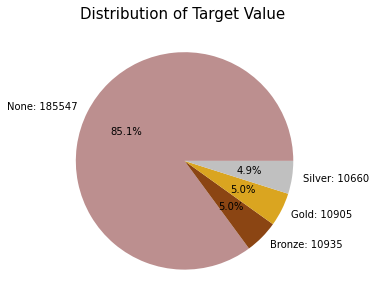

In [48]:
piedist(combined_df, '')

In the cells below, we trained six different models using the three different algorithms (k-Nearest Neighbors, Gaussian Naive Bayes, and Decision Tree) and the two different resampling techniques (random resampling and SMOTE resampling). We then compared the accuracy among the six different models. We used resampling because our target variable was imbalanced. Random resampling is an undersampling method that made all target values have 9,800 samples, while SMOTE resampling is an oversampling method for the minority classes that made all target values have 185,547 samples. 


### 3.3.6 Simple Random Sampling

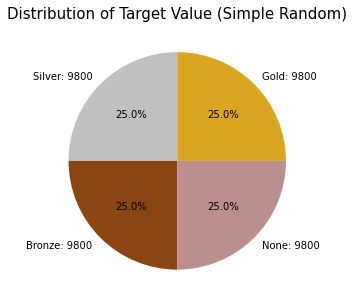

In [49]:
# Sets all target values to have a count of 9,800, since silver has the least samples
random_resampled_df = combined_df.groupby('target').apply(lambda x: x.sample(n=9800)).reset_index(drop = True)

# Create pie chart of distribution
piedist(random_resampled_df, title = '(Simple Random)')

### 3.3.7 SMOTE Sampling

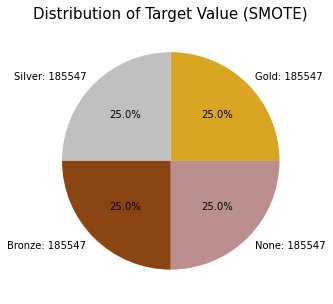

In [50]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Oversampling minority target values
X = combined_df.drop(["target"], axis =1)
y = combined_df["target"]

sm = SMOTE(sampling_strategy = 'all', random_state=3000)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Create new dataframe of resampled values
df_target_smote = pd.DataFrame(y_resampled, columns =['target'])
smote_resampled_df = pd.concat([X_resampled, df_target_smote], axis=1)

# Create pie plot of target value distribution after smote resampling
piedist(smote_resampled_df, title = '(SMOTE)')

### 3.3.8 Comparing Sampling Methods

As we can see with the output below, for both kNN and Decision Tree, the SMOTE Resampled Data has a much higher accuracy then the Random Resampled Data using kNN and Decision Tree classifiers. kNN increased from 48.06% accuracy to 88.45% accuracy between Random Resampled Data and SMOTE Resampled Data. Decision Tree increased from 57.68% accuracy to 86.38% accuracy between Random Resampled Data and SMOTE Resampled Data. However, Gaussian Naive Bayes shows little difference between the two resampling techniques, and overall, the accuracy of this model is much lower than kNN and Decision Tree, averaging under 30% accuracy. 

In [51]:
# Define dictionary of sampling methods for easy use later
sampling_techniques = {"Random Sampling" : random_resampled_df, 
                       "SMOTE Sampling" : smote_resampled_df}


def best_sampling(): 
    # Loop through sampling methods
    for sampling_name, df in sampling_techniques.items():
        
        # Redefine feature and target for each resampled dataset
        features = df.drop(["target"], axis=1)
        target = df["target"]
        
        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
        y_train = np.ravel(y_train)
        y_test = np.ravel(y_test)
    
        # Train and return accuracy score, add to performance metrics dataframe
        for name, estimator in estimators.items():
            model = estimator.fit(X=X_train, y=y_train)
            accuracy = model.score(X_test, y_test)
            print(f'{name}: \n\t Classification accuracy on the test data with {sampling_name}: {accuracy:.2%}\n')
            predicted = model.predict(X=X_test)
            metrics(sampling_name, name, model, predicted, y_test)

In [52]:
best_sampling()

k-Nearest Neighbor: 
	 Classification accuracy on the test data with Random Sampling: 49.30%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\

Gaussian Naive Bayes: 
	 Classification accuracy on the test data with Random Sampling: 28.45%

Decision Tree: 
	 Classification accuracy on the test data with Random Sampling: 57.94%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


k-Nearest Neighbor: 
	 Classification accuracy on the test data with SMOTE Sampling: 88.46%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Gaussian Naive Bayes: 
	 Classification accuracy on the test data with SMOTE Sampling: 28.43%



C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

Decision Tree: 
	 Classification accuracy on the test data with SMOTE Sampling: 86.57%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**NOTE: Since SMOTE resampling leads to significantly higher accuracy rates than simple random sampling, we use the smote resampled data for all other testing.**

In [53]:
# SMOTE resampled dataset without log transformations
features = smote_resampled_df.drop(["target"], axis=1)
target = smote_resampled_df["target"]

### 3.3.9 Data Scaling

Other than log transformations, we also wanted to use standard scaler and minmax scaler to see whether these would be more effective in correcting the distribution of values in our original dataset. For this part, we compare the performance of the scalers on both the log-transformed data and also the original features (no transformations). 

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define tests to perform
# Scaling before log and normalized transformations
scalers = {"Min Max Scaler" : MinMaxScaler(), "Standard Scaler" : StandardScaler()}
# Scaling after log and normalized transformations
scalers_log = {"Min Max Scaler (Log)": MinMaxScaler(), "Standard Scaler (Log)": StandardScaler()}

In [55]:
def best_preprocessing(scalers_dict, features, target): 
    """ scalers_dict: either scalers or scalers log for scaling methods to test
        features: predefined features dataframe (from SMOTE resampling)
        target: predefined target series (from SMOTE resampling)
    """
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
    
    # Loop through and test min max and standard scaler
    for scaling_name, scaling_method in scalers_dict.items():
        
        # Define, fit, and test scaling method
        scaler = scaling_method
        scaler.fit(X_train) 
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test)
        
        # Use trained scaler to test the three models
        for name, estimator in estimators.items():
            model = estimator.fit(X=X_train_scaled, y=y_train)
            accuracy_train = model.score(X_train_scaled, y_train)
            accuracy_test = model.score(X_test_scaled, y_test)
            
            # Add performance metrics to performance dataframe
            predicted = model.predict(X=X_test)
            metrics(scaling_name, name, model, predicted, y_test)
            
            # Return accuracy scores of different scaling methods
            print(f'{name}:')
            print(f'\t Classification accuracy on the training data with {scaling_name}: {accuracy_train:.2%}')
            print(f'\n\t Classification accuracy on the test data with {scaling_name}: {accuracy_test:.2%}\n')
            continue

### 3.3.10 Testing Scalers Without Log Transformations

In the cell below, we trained six different models using the three different algorithms (k-Nearest Neighbors, Gaussian Naive Bayes, and Decision Tree) and two different scaling techniques (Min Max Scaler and Standard Scaler), and the data has already been resampled using SMOTE since has much greater accuracy than the random resampling. The accuracy of kNN was slightly higher using Min Max Scaler than Standard Scaler (84.83% to 83.44%). The accuracy of Naive Bayes was the same using both Min Max Scaler and Standard Scaler, with an 32.05% accuracy. The accuracy of Decision Tree was about the same between Min Max Scaler and Standard Scaler, with Min Max Scaler being slightly higher (86.45% to 86.38%). kNN and Naive Bayes (for both Min Max Scaler and Standard Scaler) do not show signs of overfitting; however, with both scaling methods, Decision Tree indicates that the model might be overfitting. This is because the accuracy of the training data for the Decision Tree classifier has an accuracy of 99.9%, while the accuracy of the testing data is only around 86%; this suggests that the Decision Tree model built is too complex for the amount of information we have and fitted too closely to the particularities of our training set.

In [56]:
best_preprocessing(scalers, features, target)

C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


k-Nearest Neighbor:
	 Classification accuracy on the training data with Min Max Scaler: 89.89%

	 Classification accuracy on the test data with Min Max Scaler: 84.79%



C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

Gaussian Naive Bayes:
	 Classification accuracy on the training data with Min Max Scaler: 32.11%

	 Classification accuracy on the test data with Min Max Scaler: 32.05%



C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

Decision Tree:
	 Classification accuracy on the training data with Min Max Scaler: 99.95%

	 Classification accuracy on the test data with Min Max Scaler: 86.63%



C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

k-Nearest Neighbor:
	 Classification accuracy on the training data with Standard Scaler: 88.78%

	 Classification accuracy on the test data with Standard Scaler: 83.46%



C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

Gaussian Naive Bayes:
	 Classification accuracy on the training data with Standard Scaler: 32.11%

	 Classification accuracy on the test data with Standard Scaler: 32.05%

Decision Tree:
	 Classification accuracy on the training data with Standard Scaler: 99.95%

	 Classification accuracy on the test data with Standard Scaler: 86.55%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 3.3.11 Testing Scalers with Log Transformations

The data used here has been transformed using log transformations in order to prevent skewness. Skewness is present in our continuous numerical variables, so in using log transformations, we make these features more normally distributed. In the cell below, we trained six different models using the three different algorithms (k-Nearest Neighbors, Gaussian Naive Bayes, and Decision Tree) and two different scaling techniques (Min Max Scaler and Standard Scaler), and the data has already been resampled using SMOTE since has much greater accuracy than the random resampling. The accuracy of kNN was slightly higher using Min Max Scaler than Standard Scaler (85.61% to 84.44%). The accuracy of Naive Bayes was the same using both Min Max Scaler and Standard Scaler, with an 84.96% accuracy. The accuracy of Decision Tree was about the same between Min Max Scaler and Standard Scaler, with Min Max Scaler being slightly higher (86.39% to 86.34%). kNN and Naive Bayes for both Min Max Scaler and Standard Scaler do not show signs of overfitting, however, Decision Tree using both scaling methods indicates that the model might be overfitting. This is because the accuracy of the training data for the Decision Tree classifier has an accuracy of 99.9%, while the accuracy of the testing data is only around 86%. 

In [57]:
# Define features and target dataframes from previous, log-transformed dataset
features = df_log_transf.drop(["target"], axis=1)
target = df_log_transf["target"]

# Find best preprocessing (scaler vs minmax of log-transformed data)
best_preprocessing(scalers_log, features, target)

C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

k-Nearest Neighbor:
	 Classification accuracy on the training data with Min Max Scaler (Log): 89.71%

	 Classification accuracy on the test data with Min Max Scaler (Log): 85.86%



C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

Gaussian Naive Bayes:
	 Classification accuracy on the training data with Min Max Scaler (Log): 84.87%

	 Classification accuracy on the test data with Min Max Scaler (Log): 84.98%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Decision Tree:
	 Classification accuracy on the training data with Min Max Scaler (Log): 99.99%

	 Classification accuracy on the test data with Min Max Scaler (Log): 86.53%



C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

k-Nearest Neighbor:
	 Classification accuracy on the training data with Standard Scaler (Log): 88.56%

	 Classification accuracy on the test data with Standard Scaler (Log): 84.53%



C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

Gaussian Naive Bayes:
	 Classification accuracy on the training data with Standard Scaler (Log): 84.87%

	 Classification accuracy on the test data with Standard Scaler (Log): 84.98%

Decision Tree:
	 Classification accuracy on the training data with Standard Scaler (Log): 99.99%

	 Classification accuracy on the test data with Standard Scaler (Log): 86.53%



C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 3.3.12 Feature Selection: Recursive Feature Elimination

In [58]:
# Define features and target for feature selection and hyperparameter tuning
features = smote_resampled_df.drop(["target"], axis=1)
target = smote_resampled_df["target"]

In [59]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor 

def RFE_feature_selection(estimator, n):
    """ estimator: define which modeling technique (kNN, tree, naive bayes),
        n: define number of features to select """
    method = estimators[estimator]
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    
    # Get the most important features using RFE
    important_features = RFE(DecisionTreeClassifier(random_state = 3000), n_features_to_select = n)
    
    # Fit the RFE selector to the training data 
    important_features.fit(X_train, y_train)
    
    # Transform training and testing sets so that only the important selected features remain 
    X_train_selected = important_features.transform(X_train)
    X_test_selected = important_features.transform(X_test)
    
    # Apply method to the training data 
    model = method.fit(X=X_train_selected, y=y_train)
    
    print("Selected features after RFE: ")
    
    # Iterates through the number of columns in the df 
    for i in range(len(features.columns)): 
        
        # If the value corresponding with the column of the feature is true, the feature was used in the model
        if (important_features.support_[i] == True): 
            print("\t", features.columns[i])
            
    # Prints accuracy for the model on the training and testing sets 
    print("\n" + "Performance with selected features: ")
    print("\t" + "Accuracy for the training set: ", model.score(X_train_selected, y_train))
    print("\t" + "Accuracy for the testing set: ", model.score(X_test_selected, y_test))
    
    # Evaluate performance metrics and add to performance dataframe
    predicted = model.predict(X=X_test_selected)
    metrics('Feature Selection', estimator, model, predicted, y_test)

    

#### Feature selection with kNN classifier
n-values we tried: 4, 5, 6 7, 8, 9, 10

Using recursive feature elimination (RFE), we determined the most important features for the three different classification models. For the kNN Classifier, we obtained the highest accuracy with 8 features, which are country, year, event, GDP, age, BMI, height, and weight. The accuracy on the testing set was about 88.29%, and the model does not show overfitting. This indicates that the 8 most important features from our model are the ones listed above, which yields a higher accuracy than the kNN model without feature selection. 

In [60]:
RFE_feature_selection('k-Nearest Neighbor', 8)

Selected features after RFE: 
	 Country
	 Year
	 Event
	 GDP
	 Age
	 BMI
	 Height
	 Weight

Performance with selected features: 
	Accuracy for the training set:  0.918804040665348
	Accuracy for the testing set:  0.8828598683891413


C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Feature selection with Decision Tree classifier
n-values we tried: 4, 5, 6, 7, 8, 9, 10

For the Decision Tree Classifier, we obtained the highest accuracy with 9 features, which include Country, Year, Sport, Event, GDP, Age, BMI, Height, and Weight. The accuracy on the testing set was about 86.09%, however, the accuracy of the training set was near 100%, which indicates that the model is overfitting. The RFE feature selection indicates that the 9 most important features are the ones listed above, however the accuracy of the model did not improve significantly from the data without feature selection. 

In [61]:
RFE_feature_selection('Decision Tree', 9)

Selected features after RFE: 
	 Country
	 Year
	 Sport
	 Event
	 GDP
	 Age
	 BMI
	 Height
	 Weight

Performance with selected features: 
	Accuracy for the training set:  0.9994951863049973
	Accuracy for the testing set:  0.8609840094423515


C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Feature selection with naive Bayes classifier
n-values tried: 3, 4, 5, 6, 7, 8, 9

For the Naive Bayes Classifier, we obtained the highest accuracy with 5 features, which are Year, Event, Age, BMI, and Height. The accuracy on the testing set was about 30.66%, and the model does not indicate overfitting. This indicates that the 5 most important features from our model using Naive Bayes are the ones listed above, which yields a slightly higher accuracy (less than 1% higher) from the model without feature selection. 

In [62]:
RFE_feature_selection('Gaussian Naive Bayes', 5)

Selected features after RFE: 
	 Year
	 Event
	 Age
	 BMI
	 Height

Performance with selected features: 
	Accuracy for the training set:  0.3053997100465111
	Accuracy for the testing set:  0.3065638355780476


C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## 3.4. Model Optimization


We used Grid Search in order to hyperparameter tune our three algorithms, kNN, Decision Tree, and Naive Bayes. Hyperparameter tuning allows us to optimize our models by seeing what parameters work best for the algorithms. We want to obtain the highest accuracy, while avoiding overfitting or underfitting the model. 

In [63]:
# Define features and target for feature selection
features = smote_resampled_df.drop(["target"], axis=1)
target = smote_resampled_df["target"]

### 3.4.1 Hyperparameter Tuning using GridSearch

In [64]:
from sklearn.model_selection import GridSearchCV

def grid_search(estimator, param_grid):
    """ estimator: model to test with (knn, tree, naive bayes)
        param_grid: dictionary of different parameters and values to testa nd compare"""
    # Use grid search to find best parameters
    method = estimators[estimator]
    grid_search = GridSearchCV(method, param_grid, cv=5)
    
    # Split into train and test sets, fit with grid search
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    grid_search.fit(X=X_train, y=y_train)
    
    # Print resulting best parameters and evaluation metrics
    print("Best parameters: ", grid_search.best_params_)
    
    #print("Best cross-validation score: ", grid_search.best_score_)
    print("Test set score: ", grid_search.score(X_test, y_test))
    
    # Evaluate performance metrics and add to performance dataframe
    predicted = grid_search.predict(X=X_test)
    metrics('Grid Search CV', estimator, grid_search, predicted, y_test)


#### GridSearch for kNN classifier

For kNN, we tested the parameters n_neighbors, weights, and metric in order to find the correct combination of parameters that results in the most accurate kNN test set score. The highest accuracy was with a metric of manhattan, 1 neighbor, and weights as uniform, which yielded a 93.45% accuracy. 

In [65]:
# Hyperparameters to test
param_grid = {"n_neighbors":[1, 5, 15, 25, 55], "weights":["uniform", "distance"], "metric":["euclidean", "manhattan", "minkowski"]}

grid_search('k-Nearest Neighbor', param_grid)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Test set score:  0.9344802125606989


C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### GridSearch for Decision Tree classifier

For the Decision Tree model, we tested the parameters criterion, max_depth, and min_samples_leaf in order to determine the best parameters that result in the highest test set accuracy. The result was the criterion as entropy, max_depth of 55, and min_samples_leaf of 1, which gave us an accuracy score of 86.75% for the test set. 

In [66]:
# Hyperparameters to test
param_grid = {"criterion":["gini", "entropy"], "max_depth":[5, 11, 15, 25, 35, 55], "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search('Decision Tree', param_grid)

Best parameters:  {'criterion': 'entropy', 'max_depth': 55, 'min_samples_leaf': 1}
Test set score:  0.8674675419166034


C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### GridSearch for Naive Bayes classifier

For the Naive Bayes Classifier, we tested the parameter var_smoothing to see what value produced the most accurate model. The result was a test set score of 29.60% when var_smoothing is equal to 0.019. 

In [67]:
# Hyperparameters to test
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search('Gaussian Naive Bayes', param_grid)

Best parameters:  {'var_smoothing': 0.01873817422860384}
Test set score:  0.29601664268352496


C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\feiyu\anaconda3\lib\site-packages\pandas\core\

## 3.5. Model Testing

### 3.5.1 Find Best Models

In [68]:
performance

Base                                     \
                       k-Nearest Neighbor Gaussian Naive Bayes Decision Tree   
0            precision           0.452998             0.053008      0.549060   
             recall              0.396735             0.031583      0.569908   
             f1-score            0.423004             0.039582      0.559290   
             support          2818.000000          2818.000000   2818.000000   
1            precision           0.336095             0.000000      0.456111   
             recall              0.218546             0.000000      0.519815   
             f1-score            0.264864             0.000000      0.485884   
             support          2599.000000          2599.000000   2599.000000   
2            precision           0.354732             0.000000      0.436707   
             recall              0.201352             0.000000      0.478212   
             f1-score            0.256890             0.000000      0.456518   
             support          2662.000000          2662.000000   2662.000000   
3            precision           0.906148             0.851892      0.938963   
             recall              0.953180             0.969311      0.924343   
             f1-score            0.929069             0.906816      0.931595   
             support         46433.000000         46433.000000  46433.000000   
all          accuracy            0.852675             0.827286      0.864947   
macro avg    precision           0.512493             0.226225      0.595210   
             recall              0.442453             0.250223      0.623069   
             f1-score            0.468457             0.236599      0.608322   
             support         54512.000000         54512.000000  54512.000000   
weighted avg precision           0.828616             0.728377      0.871259   
             recall              0.852675             0.827286      0.864947   
             f1-score            0.838416             0.774467      0.867899   
             support         54512.000000         54512.000000  54512.000000   

                          Random Sampling                                     \
                       k-Nearest Neighbor Gaussian Naive Bayes Decision Tree   
0            precision           0.473999             0.392956      0.620392   
             recall              0.604745             0.228790      0.636108   
             f1-score            0.531449             0.289199      0.628152   
             support          2487.000000          2487.000000   2487.000000   
1            precision           0.443400             0.000000      0.547983   
             recall              0.474638             0.000000      0.563205   
             f1-score            0.458487             0.000000      0.555489   
             support          2484.000000          2484.000000   2484.000000   
2            precision           0.453237             0.000000      0.553055   
             recall              0.417910             0.000000      0.570481   
             f1-score            0.434858             0.000000      0.561633   
             support          2412.000000          2412.000000   2412.000000   
3            precision           0.653670             0.265685      0.598008   
             recall              0.471659             0.918080      0.546545   
             f1-score            0.547945             0.412109      0.571120   
             support          2417.000000          2417.000000   2417.000000   
all          accuracy            0.492959             0.284490      0.579388   
macro avg    precision           0.506077             0.164660      0.579859   
             recall              0.492238             0.286717      0.579085   
             f1-score            0.493185             0.175327      0.579098   
             support          9800.000000          9800.000000   9800.000000   
weighted avg precision           0.5

In [69]:
# Save evaluation metrics dataframe as csv
performance.to_csv('model_evaluation.csv')

#### Best Performing Model: 
To find the best performing models, we averaged each model’s performance across the metrics in the performance dataframe. We found that the three highest averages belonged to the Grid Search kNN (average score: 93.45%), SMOTE sampling kNN (88.54%), and Hyperparameter-tuned kNN (88.36%). In general, the kNN estimator performed the best.

In [97]:
# Define subset of original dataframe without support metric value
no_support = []
for row in performance.index:
    if row[1] != 'support':
        no_support.append(row)
final_vals = performance.loc[no_support]

# Find mean of each model using the metric scores and sort in descending order
means = final_vals.mean(axis=0)
means.sort_values(ascending=False)

Grid Search CV         k-Nearest Neighbor      0.934482
SMOTE Sampling         k-Nearest Neighbor      0.885428
Feature Selection      k-Nearest Neighbor      0.883600
Grid Search CV         Decision Tree           0.867675
SMOTE Sampling         Decision Tree           0.865906
Feature Selection      Decision Tree           0.861213
Base                   Decision Tree           0.663266
Random Sampling        Decision Tree           0.579380
Base                   k-Nearest Neighbor      0.552074
Random Sampling        k-Nearest Neighbor      0.496953
Standard Scaler (Log)  k-Nearest Neighbor      0.356353
Base                   Gaussian Naive Bayes    0.353824
Min Max Scaler (Log)   k-Nearest Neighbor      0.351436
                       Decision Tree           0.344663
Standard Scaler (Log)  Gaussian Naive Bayes    0.337402
Min Max Scaler (Log)   Gaussian Naive Bayes    0.335719
Standard Scaler (Log)  Decision Tree           0.309593
Feature Selection      Gaussian Naive Bayes    0

### Discussion

We compared the algorithms k-Nearest Neighbors, Naive Bayes, and Decision Tree. We used two resampling techniques (random resampling and SMOTE) and three data transformation techniques (log transformations, Min Max Scaling, and Standard Scaling) with the three algorithms. We then implemented feature selection and hyperparameter tuning on all of the models. We had 27 total models using various combinations of the above described methods. 
Generally, the algorithms that should be used with our predictive model was kNN, as it performed better than Naive Bayes and Decision Tree. Also, Decision Tree indicated overfitting, so kNN would be the best option. 

The model that resulted in the best performance was kNN Grid Search with SMOTE Sampling, without feature selection. Our second best performance was with kNN SMOTE sampling, without feature selection nor hyperparameter tuning. Overall, in order to get the best accuracy for Olympic medal outcome, it is best to use the kNN algorithm on all features (since feature selection did not show a significant difference).

The features in our dataset can be used to predict the target variable of type of medal earned using the algorithms we applied. Our models had relatively high accuracies for predicting the types of medals earned by Olympic athletes. Some features seem more important than others, like country, year, event, GDP, age, and BMI, but overall, our model is successful at predicting the type of medal won (no medal, bronze, silver, or gold) based on the features in our dataset. 

In past research, most Olympic prediction models have been based on the medal count, and instead we looked more closely at the type of medal earned for the athlete. Additionally, the model made popular by Daniel Johnson includes many more characteristics relating to the athlete’s country they are representing in the Olympics including more economic and political statistics. We focused on more attributes of the individual athlete. In future work, it might be interesting to add some more of these economic or political attributes that Daniel Johnson uses in his model. We only use country, GDP, and population features that focus on the athlete’s country, so it could be interesting to see if our model could become even more accurate with features about the athlete’s body like BMI, age, etc combined with these other economic and political attributes of their country. Additionally, for future work, it would be interesting to see if unsupervised algorithms perform well on our dataset. Since this dataset is labeled, we would need to drop the target variable column, but an unsupervised model would find correlations and patterns in our data. It might not be as accurate but it would still enable us to see what patterns are found and what features are most useful. Also, one fun application of our model would be using it to predict the upcoming Olympic Games! Since the data for athletes competing this summer is available publicly, a testing set could be made containing these athletes. Then it could be run through our model to see the predicted outcomes of what medal they will win (none, bronze, silver, or gold). In order to test the accuracy of the Tokyo testing set, it would be compared with the actual results of the Olympics. This would be interesting to see how well our model performs on this year’s Olympics. 


### Contributions

Kelly Phalen: Kelly mainly worked on the written parts of this project report, also assisting in other portions of the project. For the written aspect, Kelly conducted background research on our topic, identified our research questions, and also wrote the executive summary and introduction parts. Kelly wrote multiple detailed paragraphs describing our project process and reasoning. She wrote the data acquisition, data analysis, model training, model optimization, and discussion portions of this report. For the coding portion of the project, Kelly helped with data cleaning (removing null values), feature engineering, and sampling. In particular, she figured out how to use SMOTE to resample our data to improve our results. In the model training portion, Kelly also worked with Xinyu on developing functions to compare the different sampling, scaling, and feature selection methods. Kelly helped Emily with formatting and adding the written portions into the final jupyter notebook.

Emily Wang: Emily mostly worked on the data analysis portion of this project report. For the written parts of this project, Emily wrote the sections on Data Wrangling and Data Exploration. Furthermore, Emily developed the visualizations for the data exploration portion, and also wrote out descriptions for each visualization. She worked on creating visualizations to explore our dataset, and also to identify correlations between different features (using a heat map and other images). For the data cleaning, Emily worked with both Kelly and Xinyu on cleaning the original dataset. Emily also created the function to randomly sample the dataset in order to improve the distribution of the target values. For the model training portion, Emily worked with Xinyu on creating the classification report and the corresponding dataframe of evaluation metrics. Towards the end of our project, Emily worked on formatting and combining the written and code portions of the project report.

Xinyu Wu: Xinyu worked primarily on various different modeling techniques. For the data cleaning portion, Xinyu was responsible for finding, downloading, cleaning, and merging the geodataframe. In the data engineering/preprocessing portion, Xinyu worked on the log-transformations and normalization. For model training (3.3), Xinyu worked on creating the dataframe to store evaluation metrics for each test, and also collaborated with Kelly to test the different sampling and scaling methods. For data sampling, Xinyu identified the initial dataset’s target distribution and created the pie charts showing the distributions. For the other model training tests, Xinyu created functions for each test, and worked on optimizing the models using hyperparameter tuning and feature selection. Xinyu also worked on identifying the optimal models and organizing the jupyter notebook. In general, Xinyu primarily focused on the model training and optimization portion of this report.